# Motivation
The goal of this notebook is to show how to create a text filled color up to certain percentage as a tools of visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from skimage import io

In [2]:
def plot_filled_text(text='Untitled', percentage=0.5, color='denim blue', ax=None):
    
    fig, ax1 = plt.subplots(figsize=(13, 2));
    ax1.text(0, 0, text, fontsize=144, fontweight='bold', color=sns.xkcd_rgb['light grey']);
    ax1.axis('off');

    ax1.xaxis.set_major_locator(plt.NullLocator());
    ax1.yaxis.set_major_locator(plt.NullLocator());
    fig.savefig(fname='temp.png', dpi=300, bbox_inches='tight', pad_inches=0);

    plt.close()


    img = io.imread('temp.png')
    height, width, _ = img.shape

    output = np.copy(img)

    light_grey = sns.xkcd_palette(['light grey'])[0]
    light_grey = [int(x*255) for x in light_grey] + [255]
    light_grey

    mask = (img == light_grey).all(-1)

    start = np.where(mask.any(1) == True)[0][0]
    end = np.where(mask.any(1) == True)[0][-1]
    font_height = end - start

    mask2 = np.zeros((height, width), dtype=bool)
    mask2[(font_height - int(percentage*font_height)):end, ] = True

    mask3 = mask & mask2
    
    mask_color = sns.light_palette(sns.xkcd_palette([color])[0], 20)[int(15*percentage)+4]
    mask_color = [int(x*255) for x in mask_color]
    output[mask3] = mask_color

    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(output)
    ax.axis('off');

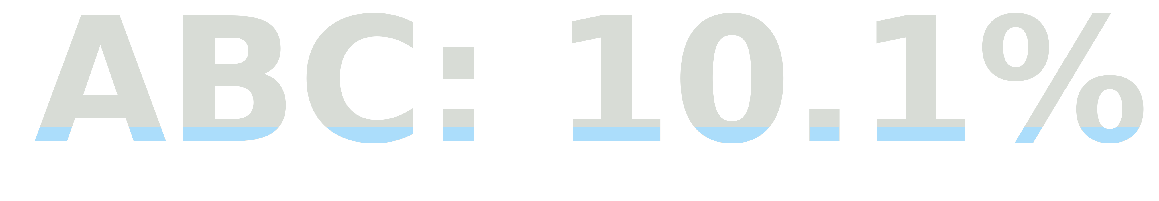

In [3]:
plot_filled_text('ABC: 10.1%', percentage=0.1, color='azure')

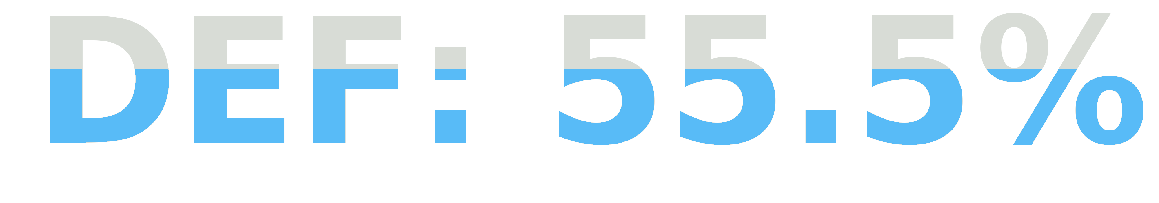

In [4]:
plot_filled_text('DEF: 55.5%', percentage=0.55, color='azure')

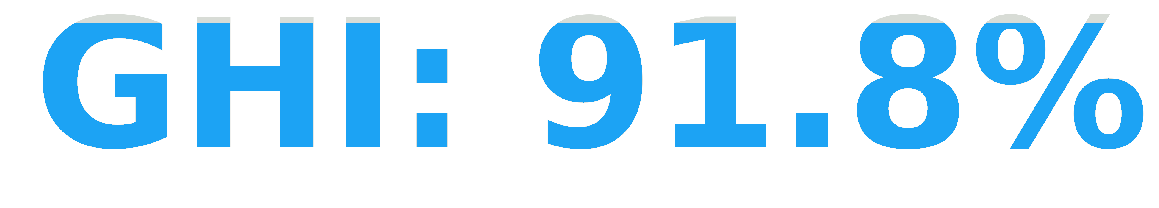

In [5]:
plot_filled_text('GHI: 91.8%', percentage=0.91, color='azure')

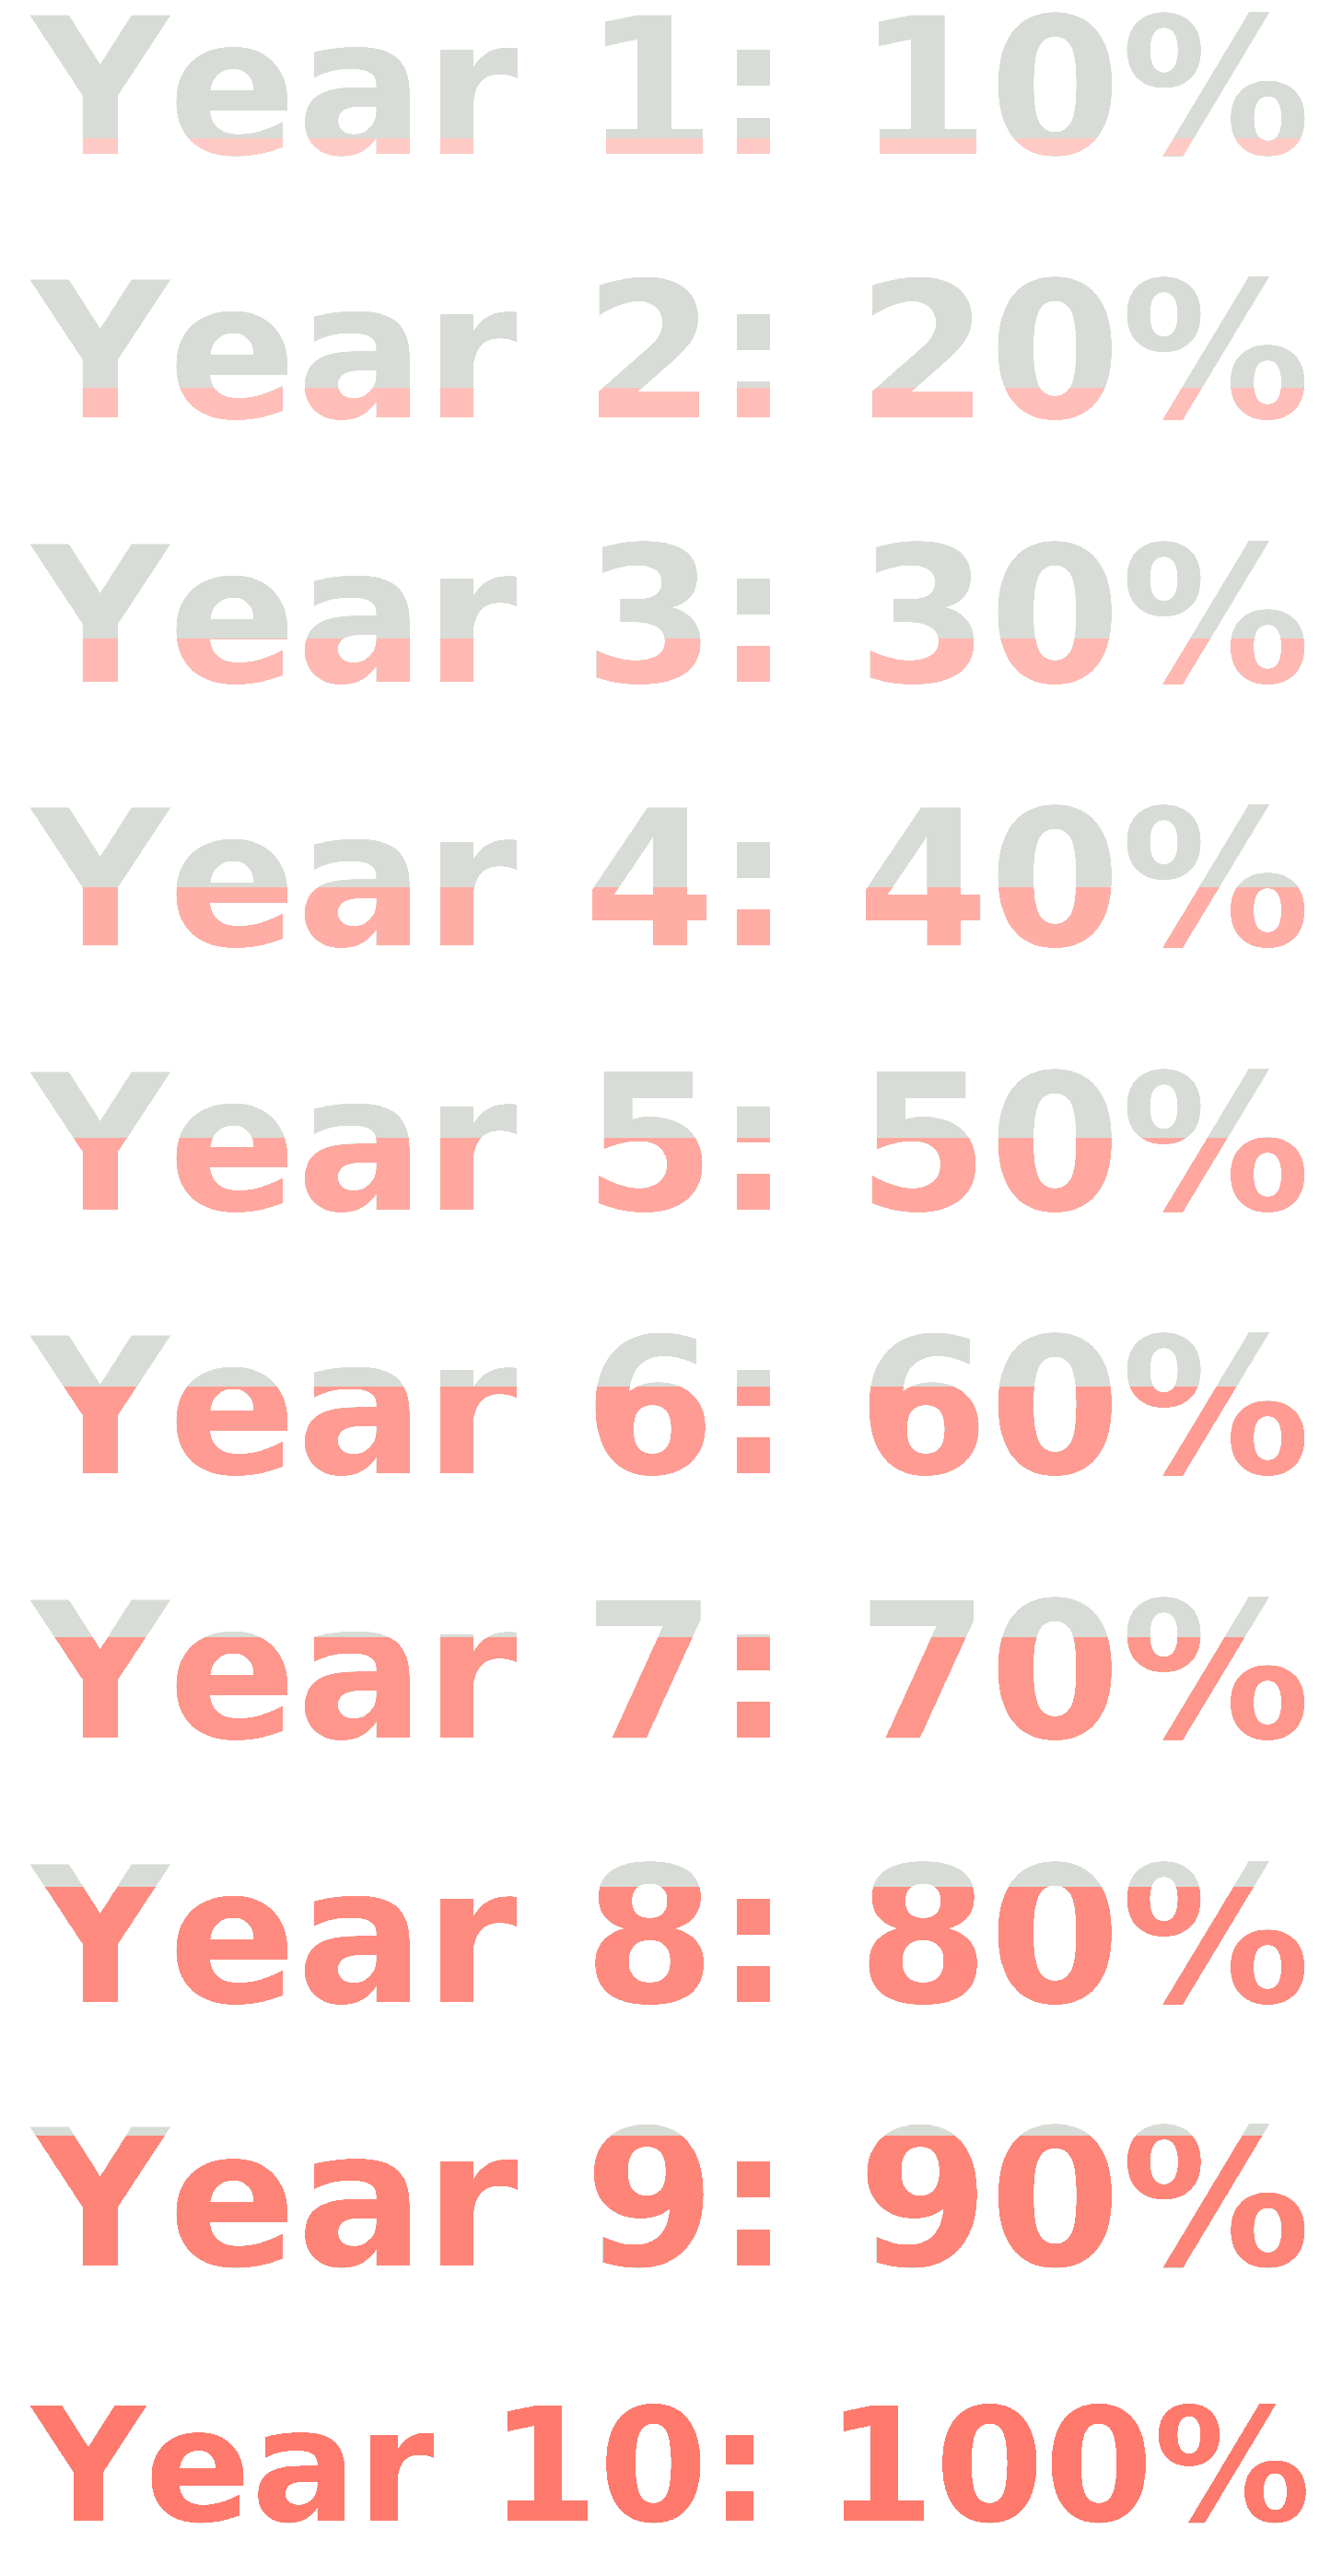

In [6]:
fig, axes = plt.subplots(10, 1, figsize=(20, 40))

for i, ax in enumerate(axes):
    
    plot_filled_text(text='Year {0}: {1}%'.format(i+1, (i+1)*10), percentage=float(i+1)/10, color='salmon', ax=ax)

plt.tight_layout()